# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [135]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG16 classifier

In [136]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG16

vgg = VGG16()
print(vgg)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [137]:
%%time
opt = optim.SGD(vgg.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg, opt, loss_fn)
# reduce_lr = lambda epoch: 0.1 ** (epoch // 50)
# lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# scheduler = optim.lr_scheduler.MultiStepLR(opt, milestones=[80, 130], gamma=0.1)
# lr_scheduler = None
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:2.2 acc:16.74% val_loss:1.9 val_acc:22.80%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.8 acc:27.84% val_loss:1.8 val_acc:30.48%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:1.5 acc:44.16% val_loss:1.4 val_acc:49.04%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:1.1 acc:59.92% val_loss:1.3 val_acc:57.66%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.91 acc:67.88% val_loss:1.0 val_acc:64.76%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.8 acc:72.32% val_loss:0.87 val_acc:71.38%
Epoch: 7/150, lr:

[##################################################] 100.00% loss:0.25 acc:91.72% val_loss:0.61 val_acc:81.72%
Epoch: 60/150, lr:5.00e-02
[##################################################] 100.00% loss:0.25 acc:91.48% val_loss:0.53 val_acc:84.06%
Epoch: 61/150, lr:5.00e-02
[##################################################] 100.00% loss:0.24 acc:91.86% val_loss:0.5 val_acc:84.70%
Epoch: 62/150, lr:2.50e-02
[##################################################] 100.00% loss:0.15 acc:94.88% val_loss:0.25 val_acc:92.36%
Epoch: 63/150, lr:2.50e-02
[##################################################] 100.00% loss:0.14 acc:95.42% val_loss:0.32 val_acc:90.00%
Epoch: 64/150, lr:2.50e-02
[##################################################] 100.00% loss:0.13 acc:95.71% val_loss:0.3 val_acc:91.26%
Epoch: 65/150, lr:2.50e-02
[##################################################] 100.00% loss:0.13 acc:95.53% val_loss:0.33 val_acc:90.14%
Epoch: 66/150, lr:2.50e-02
[###################################

[##################################################] 100.00% loss:0.002 acc:99.96%% val_loss:0.29 val_acc:94.00%
Epoch: 119/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0026 acc:99.94% val_loss:0.29 val_acc:94.20%
Epoch: 120/150, lr:7.81e-04
[##################################################] 100.00% loss:0.002 acc:99.96% val_loss:0.29 val_acc:94.00%
Epoch: 121/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0018 acc:99.98% val_loss:0.29 val_acc:94.18%
Epoch: 122/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0017 acc:99.99% val_loss:0.29 val_acc:94.04%
Epoch: 123/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0017 acc:99.97% val_loss:0.29 val_acc:94.12%
Epoch: 124/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0018 acc:99.97% val_loss:0.29 val_acc:94.24%
Epoch: 125/150, lr:7.81e-04
[#############

# plot loss history
We check the classifier by plotting the loss and acc.

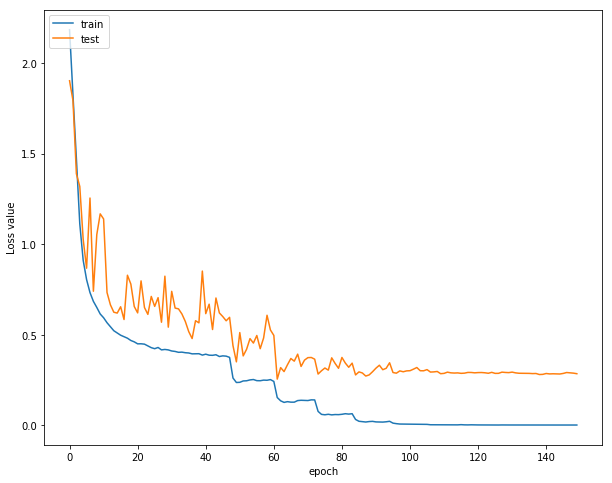

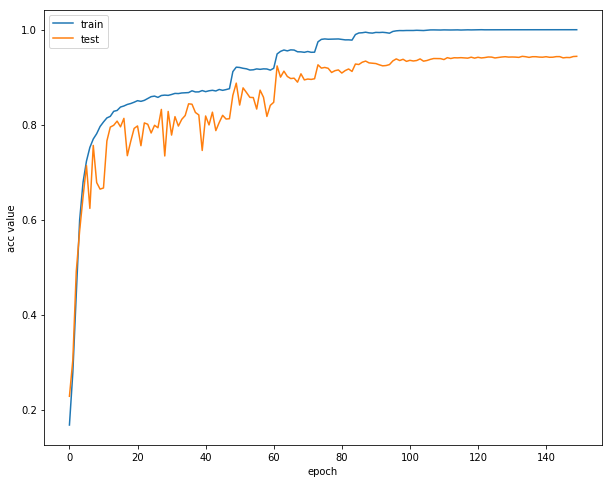

In [138]:
plot_history(history)

# test classifier
test on test data

In [139]:
# 93.92
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.4} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.2848 test_acc:94.38%
